In [1]:
import matplotlib.pyplot as plt

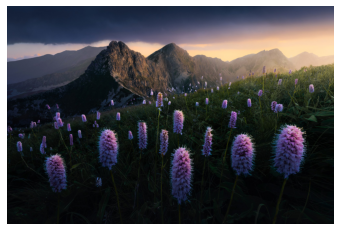

In [15]:
img=plt.imread("/content/image.jpg")
plt.imshow(img)
plt.axis("off");

In [3]:
img.shape

(1330, 2000, 3)

In [4]:
img_flat=img.reshape(img.shape[0]*img.shape[1], 3)

In [30]:
img_flat.shape

(2660000, 3)

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans=KMeans(n_clusters=8, random_state=0).fit(img_flat)

In [11]:
import numpy as np
img_flat2=img_flat.copy()
for i in np.unique(kmeans.labels_):
  img_flat2[kmeans.labels_==i,:]=kmeans.cluster_centers_[i]

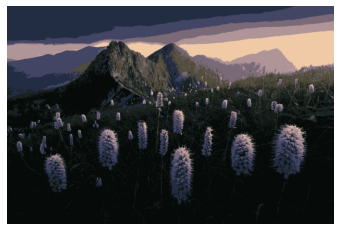

In [14]:
img2=img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis("off");

In [29]:
img_flat

array([[21, 37, 63],
       [21, 37, 63],
       [21, 37, 63],
       ...,
       [ 6, 10, 11],
       [ 6, 10, 11],
       [ 6, 10, 11]], dtype=uint8)

In [32]:
# Now we define the function for a custom K value
def image_cluster(img, k):
  img_flat=img.reshape(img.shape[0]*img.shape[1], 3)
  kmeans=KMeans(n_clusters=k, random_state=0).fit(img_flat)
  img_flat2=img_flat.copy()
  for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:]=kmeans.cluster_centers_[i]
  img2=img_flat2.reshape(img.shape)
  return img2, kmeans.inertia_

In [33]:
# Now we choose the best K value in the range [2, 20]
k_vals=list(range(2, 21, 2))
img_list=[]
inertia=[]
for k in k_vals:
  img2, ine = image_cluster(img, k)
  img_list.append(img2)
  inertia.append(ine)

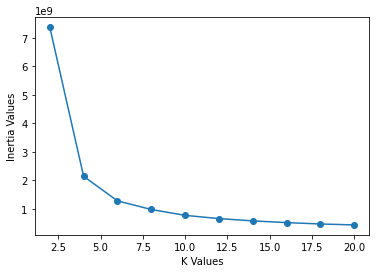

In [34]:
plt.plot(k_vals, inertia)
plt.scatter(k_vals, inertia)
plt.xlabel("K Values")
plt.ylabel("Inertia Values");

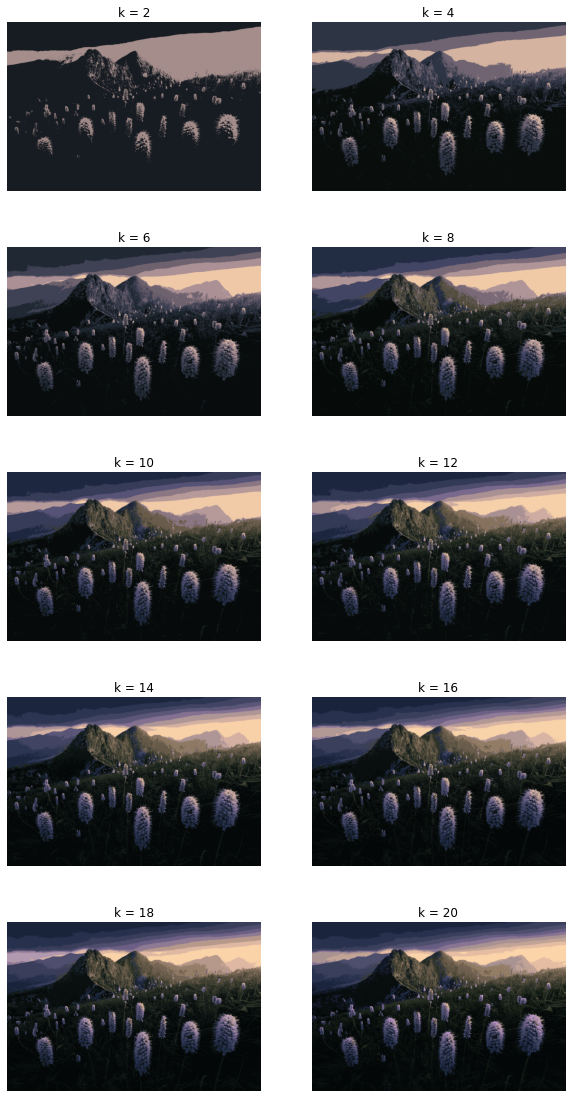

In [35]:
# Plot each image with its corresponding number of clusters 
plt.figure(figsize=[10, 20])
for i in range(len(k_vals)):
  plt.subplot(5, 2, i+1)
  plt.imshow(img_list[i])
  plt.title('k = ' + str(k_vals[i]))
  plt.axis("off");